In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('silver_dataset_polarity_output.csv')
print(data)

       Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0               0         17171           17171             25100   
1               1         17172           17172             25101   
2               2         17173           17173             25102   
3               3         17174           17174             25103   
4               4         17175           17175             25104   
...           ...           ...             ...               ...   
13496       14342         31513           31513             43811   
13497       14343         31514           31514             43812   
13498       14344         31515           31515             43813   
13499       14345         31516           31516             43814   
13500       14347         31518           31518             43816   

                        id      conversation_id           created_at  \
0      1376962511099035652  1376962511099035652  2021-03-30 23:50:20   
1      1376961972885938181 

In [3]:
id = data.loc[:,'id'].to_numpy()
text = data.loc[:,'tweet'].to_numpy()
polarity = data.loc[:,'polarity_api_output'].to_numpy()
dt = data.loc[:,'date'].to_numpy()

In [4]:
pos = dict()
neg = dict()
cnt = 0

for x in dt:
    if x not in pos:
        pos[x] = 0
    if x not in neg:
        neg[x] = 0
    # print(polarity[x].shape)
    if polarity[cnt] == 'POSITIVE':
        pos[x] += 1
    if polarity[cnt] == 'NEGATIVE':
        neg[x] += 1
    cnt += 1

for key, value in pos.items():
    cnt = pos[key] + neg[key]
    pos[key] = pos[key] / cnt
    neg[key] = neg[key] / cnt
    print(key, pos[key], neg[key])

2021-03-30 0.3425414364640884 0.6574585635359116
2021-03-29 0.33146067415730335 0.6685393258426966
2021-03-28 0.3333333333333333 0.6666666666666666
2021-03-27 0.3983050847457627 0.6016949152542372
2021-03-26 0.2916666666666667 0.7083333333333334
2021-03-25 0.38181818181818183 0.6181818181818182
2021-03-24 0.3933333333333333 0.6066666666666667
2021-03-23 0.2953020134228188 0.7046979865771812
2021-03-22 0.3684210526315789 0.631578947368421
2021-03-21 0.2727272727272727 0.7272727272727273
2021-03-20 0.3161290322580645 0.6838709677419355
2021-03-19 0.3496932515337423 0.6503067484662577
2021-03-18 0.3279569892473118 0.6720430107526881
2021-03-17 0.3507853403141361 0.6492146596858639
2021-03-16 0.3611111111111111 0.6388888888888888
2021-03-15 0.4108527131782946 0.5891472868217055
2021-03-14 0.37373737373737376 0.6262626262626263
2021-03-13 0.3114754098360656 0.6885245901639344
2021-03-12 0.36065573770491804 0.639344262295082
2021-03-11 0.2962962962962963 0.7037037037037037
2021-03-10 0.36885

([<matplotlib.axis.XTick at 0x7f24e4b0c220>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

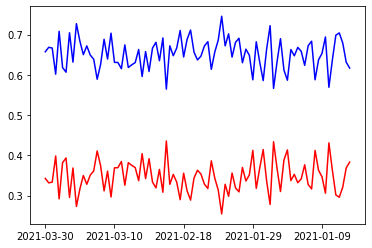

In [5]:
plt.plot(list(pos.keys()), list(pos.values()), color = 'r')
plt.plot(list(neg.keys()), list(neg.values()), color = 'b')
plt.xticks(list(pos.keys())[::20])

In [23]:
neg_idx = np.where(polarity=='NEGATIVE')[0]
pos_idx = np.where(polarity=='POSITIVE')[0]

In [24]:
np.random.shuffle(neg_idx)
np.random.shuffle(pos_idx)

In [25]:
neg_idx = neg_idx[:1000]
pos_idx = pos_idx[:1000]

In [28]:
idx = np.concatenate([neg_idx, pos_idx])

In [31]:
gold_raw = data.loc[idx]
print(gold_raw)

       Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
2972         3152         20323           20323             29249   
9039         9627         26798           26798             37553   
11616       12347         29518           29518             41076   
4105         4340         21511           21511             30765   
4706         4988         22159           22159             31655   
...           ...           ...             ...               ...   
9229         9831         27002           27002             37782   
11300       12014         29185           29185             40618   
5540         5882         23053           23053             32807   
12451       13225         30396           30396             42228   
6004         6384         23555           23555             33443   

                        id      conversation_id           created_at  \
2972   1369812663623180288  1369812663623180288  2021-03-11 06:19:23   
9039   1354514776534220804 

In [32]:
gold_raw.to_csv('gold_raw.csv')

In [36]:
tmp_data = pd.read_csv('gold_raw.csv')
id = tmp_data.loc[:,['id','tweet']]
# text = tmp_data.loc[:,'tweet']

In [38]:
id.to_csv('sheet.csv')